# Standford Open Policing Project dataset
* Data obtained from [DataCamp](https://www.datacamp.com/) "Analysing Police Activity with pandas" course.
* Dataset is about traffic stops by police officers


In [1]:
#imports
import pandas as pd
import numpy as np

## EDA n Cleaning

In [2]:
#read in the .csv file with parsing separate date and time 
#columns into single column and datetime data type
police = pd.read_csv('data/police.csv', parse_dates=[['stop_date','stop_time']])

In [3]:
#eye-ball the columns
police.head(2)

,stop_date_stop_time,state,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,RI,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,RI,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [4]:
#summary information about the DF
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
stop_date_stop_time    91741 non-null datetime64[ns]
state                  91741 non-null object
county_name            0 non-null float64
driver_gender          86536 non-null object
driver_race            86539 non-null object
violation_raw          86539 non-null object
violation              86539 non-null object
search_conducted       91741 non-null bool
search_type            3307 non-null object
stop_outcome           86539 non-null object
is_arrested            86539 non-null object
stop_duration          86539 non-null object
drugs_related_stop     91741 non-null bool
district               91741 non-null object
dtypes: bool(2), datetime64[ns](1), float64(1), object(10)
memory usage: 8.6+ MB


In [5]:
#missing values summary
police.isna().sum()

stop_date_stop_time        0
state                      0
county_name            91741
driver_gender           5205
driver_race             5202
violation_raw           5202
violation               5202
search_conducted           0
search_type            88434
stop_outcome            5202
is_arrested             5202
stop_duration           5202
drugs_related_stop         0
district                   0
dtype: int64

In [6]:
police['state'].value_counts(dropna=False)

RI    91741
Name: state, dtype: int64

* Column **'state'** is redundant - holds a single value for all rows - we can drop it.

In [7]:
#dropping 'state' column
police.drop('state', axis='columns', inplace=True)

In [8]:
police.county_name.value_counts(dropna=False)

NaN    91741
Name: county_name, dtype: int64

In [9]:
#dropping column 'county_name' since
#it contains nothing but NaN-s
police.drop('county_name', axis='columns', inplace=True)

In [10]:
print(police['driver_gender'].value_counts(dropna=False))

M      62762
F      23774
NaN     5205
Name: driver_gender, dtype: int64


In [11]:
print(police['driver_race'].value_counts(dropna=False))

White       61872
Black       12285
Hispanic     9727
NaN          5202
Asian        2390
Other         265
Name: driver_race, dtype: int64


In [12]:
print(police['violation_raw'].value_counts(dropna=False))

Speeding                            48424
Other Traffic Violation             16224
Equipment/Inspection Violation      10922
NaN                                  5202
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1392
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64


In [13]:
print(police['violation'].value_counts(dropna=False))

Speeding               48424
Moving violation       16224
Equipment              10922
NaN                     5202
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [14]:
print(police['search_conducted'].value_counts(dropna=False))

False    88434
True      3307
Name: search_conducted, dtype: int64


In [15]:
print(police['search_type'].value_counts(dropna=False))

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [16]:
print(police['stop_outcome'].value_counts(dropna=False))

Citation            77092
NaN                  5202
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64


In [17]:
print(police['is_arrested'].value_counts(dropna=False))

False    83461
NaN       5202
True      3078
Name: is_arrested, dtype: int64


In [18]:
print(police['stop_duration'].value_counts(dropna=False))

0-15 Min     69579
16-30 Min    13740
NaN           5202
30+ Min       3220
Name: stop_duration, dtype: int64


In [19]:
print(police['drugs_related_stop'].value_counts(dropna=False))

False    90879
True       862
Name: drugs_related_stop, dtype: int64


In [20]:
print(police['district'].value_counts(dropna=False))

Zone X4    24279
Zone K3    20405
Zone K2    18397
Zone X3    17013
Zone K1     8678
Zone X1     2969
Name: district, dtype: int64


After initial data exploration we: <br> 
* removed **2** columns
* noticed there are exactly **5202** NaN values for 6-7 columns. Meaning, if these NaN values are shared for the same observations we need to delete these rows.
* the **'search_type'** field only has 3.6% other than NaN values. We need to decide if we should keep that column or not.
* we might want to sample down **'violation_raw'** values.

In [21]:
#examine what DF after removing 2 columns
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 12 columns):
stop_date_stop_time    91741 non-null datetime64[ns]
driver_gender          86536 non-null object
driver_race            86539 non-null object
violation_raw          86539 non-null object
violation              86539 non-null object
search_conducted       91741 non-null bool
search_type            3307 non-null object
stop_outcome           86539 non-null object
is_arrested            86539 non-null object
stop_duration          86539 non-null object
drugs_related_stop     91741 non-null bool
district               91741 non-null object
dtypes: bool(2), datetime64[ns](1), object(9)
memory usage: 7.2+ MB


### Missing Values
By looking at DF <code>info()</code>, we see that there are 5202+ **NaN** values for 7 columns:
* driver_gender
* driver_race
* violation_raw
* violation
* stop_outcome
* is_arrested
* stop_duration <br>
This may indicate that these NaN values are shared by all of those columns at the same time. Meaning, if it is True we can eliminate those redundant rows since they contain too little information per observation. The **'driver_gender'** column has 3 more NaN values but these seem to be legimate NaN-s. First let's examine if those NaN values are indeed shared.

In [22]:
#select DF with these columns only
police_nans = police[['driver_gender','driver_race','violation_raw',
                     'violation', 'stop_outcome','is_arrested','stop_duration']]
#visualize every 20k-th row
police_nans.iloc[::20000,]

,driver_gender,driver_race,violation_raw,violation,stop_outcome,is_arrested,stop_duration
0,M,White,Equipment/Inspection Violation,Equipment,Citation,False,0-15 Min
20000,M,White,Other Traffic Violation,Moving violation,Citation,False,0-15 Min
40000,F,White,Other Traffic Violation,Moving violation,Warning,False,0-15 Min
60000,M,Black,Equipment/Inspection Violation,Equipment,Citation,False,0-15 Min
80000,F,White,Speeding,Speeding,Citation,False,16-30 Min


In [23]:
#capture indices where all rows are NaN-s. 
idx = police_nans.index[police_nans.isnull().all('columns')]

#subset of such rows
police_nans.iloc[idx,]

,driver_gender,driver_race,violation_raw,violation,stop_outcome,is_arrested,stop_duration
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
91595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91713,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The function <code>all('columns')</code> assures that every single column has a <code>NaN</code> value per row. And since we found 5202 of such rows we can delete these rows by **index** from the DF and re-index it.

In [24]:
#removing rows from the DF where 7 columns have NaN values
police2 = police.drop(idx, axis='index')

In [25]:
police2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86539 entries, 0 to 91740
Data columns (total 12 columns):
stop_date_stop_time    86539 non-null datetime64[ns]
driver_gender          86536 non-null object
driver_race            86539 non-null object
violation_raw          86539 non-null object
violation              86539 non-null object
search_conducted       86539 non-null bool
search_type            3307 non-null object
stop_outcome           86539 non-null object
is_arrested            86539 non-null object
stop_duration          86539 non-null object
drugs_related_stop     86539 non-null bool
district               86539 non-null object
dtypes: bool(2), datetime64[ns](1), object(9)
memory usage: 7.4+ MB


We have missing values for:
* **driver_gender**
* **search_type**

In [26]:
#inspect missing 'driver_gender' observations
police2[police2.driver_gender.isna()]

,stop_date_stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
34306,2009-04-25 23:33:00,NaN,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K1
39818,2010-01-23 00:02:00,NaN,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
89024,2015-09-08 18:29:00,NaN,White,Call for Service,Other,False,NaN,No Action,False,30+ Min,False,Zone K3


It is difficult/unpractical to **impute** the missing driver_gender values, thus we opt for the simplest solution to just remove these rows as well. And since the dataset is 85k observations long we do not lose much information while doing that.

In [27]:
#index values for NaN-s
ndx = police2[police2.driver_gender.isna()].index

#remove remaining 'driver_gender' NaN-s
police2.drop(ndx, axis='index', inplace=True)

In [28]:
#check if these values are indeed missing now
print('Length of the DF:',len(police2))

Length of the DF: 86536


In [29]:
police2[police2.driver_gender.isna()]

,stop_date_stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district


**search_conducted**

In [30]:
police2.search_conducted.value_counts(dropna=False)

False    83229
True      3307
Name: search_conducted, dtype: int64

In [31]:
police2.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

### Down-sampling
We want to downsample values that contribute to the total observation less than, lets say **3%** into a single let say *'Other'* category.

*violation_raw* should be downsampled by value counts. 

In [32]:
police2.violation_raw.value_counts(normalize=True, dropna=False)

Speeding                            0.559571
Other Traffic Violation             0.187483
Equipment/Inspection Violation      0.126202
Registration Violation              0.042791
Seatbelt Violation                  0.033004
Special Detail/Directed Patrol      0.028508
Call for Service                    0.016074
Motorist Assist/Courtesy            0.002369
Violation of City/Town Ordinance    0.002092
APB                                 0.001052
Suspicious Person                   0.000647
Warrant                             0.000208
Name: violation_raw, dtype: float64

In [33]:
#dict for replacing values
replace_dict = {'Speeding':'Speeding',
                'Other Traffic Violation':'Moving',
                'Equipment/Inspection Violation':'Equipment',
                'Registration Violation':'Registration',
                'Seatbelt Violation':'Seat belt'}
#copy of the df
police3 = police2.copy()

#keeping values > 3% and grouping all other
#values into value type 'Other'
police3.violation_raw = police2.violation_raw.apply(lambda x: x if x in replace_dict else 'Other')

In [34]:
police3.violation_raw.value_counts()

Speeding                          48423
Other Traffic Violation           16224
Equipment/Inspection Violation    10921
Other                              4409
Registration Violation             3703
Seatbelt Violation                 2856
Name: violation_raw, dtype: int64

In [35]:
#dropping violation_raw column since it is equivalent to violation
police3.drop('violation_raw', axis='columns', inplace=True)

In [36]:
police3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 11 columns):
stop_date_stop_time    86536 non-null datetime64[ns]
driver_gender          86536 non-null object
driver_race            86536 non-null object
violation              86536 non-null object
search_conducted       86536 non-null bool
search_type            3307 non-null object
stop_outcome           86536 non-null object
is_arrested            86536 non-null object
stop_duration          86536 non-null object
drugs_related_stop     86536 non-null bool
district               86536 non-null object
dtypes: bool(2), datetime64[ns](1), object(8)
memory usage: 6.8+ MB


In [37]:
#rename 1st column
police3.rename({'stop_date_stop_time':'stop_datetime'}, axis='columns', inplace=True)

### Data Types

It's beneficary to infer data types if possible.

In [38]:
#change 'is_arrested' dtype to bool
police3['is_arrested'] = police3.is_arrested.astype('bool')

police3.is_arrested.dtype

dtype('bool')

In [39]:
police3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 11 columns):
stop_datetime         86536 non-null datetime64[ns]
driver_gender         86536 non-null object
driver_race           86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null bool
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(3), datetime64[ns](1), object(7)
memory usage: 6.2+ MB


In [40]:
categoricals = ['driver_gender', 'driver_race', 'violation', 
        'stop_outcome', 'district']
police3[categoricals] = police[categoricals].astype('category')

In [41]:
police3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 11 columns):
stop_datetime         86536 non-null datetime64[ns]
driver_gender         86536 non-null category
driver_race           86536 non-null category
violation             86536 non-null category
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null category
is_arrested           86536 non-null bool
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null category
dtypes: bool(3), category(5), datetime64[ns](1), object(2)
memory usage: 3.3+ MB


Categorical dtype allows more efficient data storage and manipulation.

### Indexing

In [42]:
#use datetime as our data index
police_c = police3.set_index('stop_datetime')

In [43]:
#_c stands for clean
police_c.head(3)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


## Analysis

### Gender

**Do the genders commit different violations?**
To answer that, we can simply use <code>value_counts()</code> method separately for male and female and compar the normalized values.

In [44]:
male_violation = police_c[police_c.driver_gender == 'M'].violation.value_counts(normalize=True)
female_violation = police_c[police_c.driver_gender == 'F'].violation.value_counts(normalize=True)

In [45]:
print('Male violations\n\n{}'.format(male_violation))
print('-----------------------------')
print('Female violations\n\n{}'.format(female_violation))

Male violations

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64
-----------------------------
Female violations

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


* Female drivers violate the speed limits more (by 13,5%) than males
* Male driver violations are more evenly distributed than females.
<br>
Let's visualize the results.

In [46]:
#rename violation columns to specify which
#gender it corresponds to and turn them into DFs
male_vio_df = male_violation.to_frame().rename(columns={'violation':'male'})
female_vio_df = female_violation.to_frame().rename(columns={'violation':'female'})

#concatenate DF-s and sort descendingly
violations_df = pd.concat([male_vio_df,female_vio_df], axis='columns')
violations_df.sort_values(by='male', ascending=False, inplace=True)

In [47]:
violations_df

,male,female
Speeding,0.522243,0.658114
Moving violation,0.206144,0.138218
Equipment,0.134158,0.105199
Other,0.058985,0.029738
Registration/plates,0.042175,0.044418
Seat belt,0.036296,0.024312


In [48]:
#import bokeh stuff
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.glyphs import VBar
from bokeh.io import show, output_notebook
from bokeh.transform import dodge

In [49]:
#initialize bokeh plots into jupyter output
#rather than seprate browser page
output_notebook()

Loading BokehJS ...

In [50]:
#data source
source = ColumnDataSource(data=violations_df)

#define the plot (canvas)
p = figure(x_range=violations_df.index.values.to_list(),
           y_range=(0,1), plot_height=350,
           title='Driving Violation Density Normalized by Gender')

#axis labels and tick label orientation
p.xaxis.axis_label = 'Violation Type'
p.xaxis.major_label_orientation = np.pi/10
p.yaxis.axis_label = 'Density per Gender'

#define the vertical bars - glyphs
#dodge shifts vbars accordingly from the middle
p.vbar(x=dodge('index', -0.18, range=p.x_range), 
       top='male', bottom=0, width=0.3, source=source,
       fill_color='blue', legend_label='male', line_color='black')

p.vbar(x=dodge('index',0.18, range=p.x_range),
       top='female',bottom=0, width=0.3, source=source, 
       fill_color='red', legend_label='female', line_color='black')

p.xgrid.grid_line_color = None

show(p)

**Does gender affect who gets a ticket for speeding?**<br>
We need to compare the stop_outcome proportions for men and woman separately and compare them.

In [51]:
#separate DF-s by gender and only Speeding violations
male_speeders = police_c[(police_c.driver_gender == 'M') & (police_c.violation == 'Speeding')]
female_speeders = police_c[(police_c.driver_gender == 'F') & (police_c.violation == 'Speeding')]

#proportions of the outcomes
male_speed_out = male_speeders.stop_outcome.value_counts(normalize=True)
female_speed_out = female_speeders.stop_outcome.value_counts(normalize=True)

speed_outcomes = pd.concat([male_speed_out.to_frame().rename(columns={'stop_outcome':'male'}), 
                            female_speed_out.to_frame().rename(columns={'stop_outcome':'female'})], 
                            axis='columns')
speed_outcomes

,male,female
Arrest Driver,0.015895,0.005752
Arrest Passenger,0.001281,0.000639
Citation,0.944595,0.952192
N/D,0.000976,0.000959
No Action,0.001068,0.000383
Warning,0.036184,0.040074


In [52]:
speed_outcomes.columns = pd.MultiIndex.from_product([['stop_outcome'], ['male','female']])
speed_outcomes.sort_values(by=('stop_outcome', 'male'), ascending=False, inplace=True)

In [53]:
speed_outcomes

stop_outcome          
                         male    female
Citation             0.944595  0.952192
Warning              0.036184  0.040074
Arrest Driver        0.015895  0.005752
Arrest Passenger     0.001281  0.000639
No Action            0.001068  0.000383
N/D                  0.000976  0.000959

Gender has no role on Speeding ticketing since the ticketing values are almost exact.

**Does gender affect whose vehicle is searched?**

In [54]:
male_searched = police_c[(police_c.driver_gender == 'M')].search_conducted.value_counts(normalize=True)
female_searched = police_c[(police_c.driver_gender == 'F')].search_conducted.value_counts(normalize=True)

In [55]:
searched = pd.concat([male_searched.to_frame().rename(columns={'search_conducted':'male'}), 
                      female_searched.to_frame().rename(columns={'search_conducted':'female'})],
                      axis='columns')

In [56]:
searched

,male,female
False,0.954574,0.980819
True,0.045426,0.019181


In [57]:
#another way of answering the same question
police_c.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

Males are searched twice as often as females. But this may arise just because the difference in violations they commit. Investigate this by comparing search_conducted rates by violation per gender.

In [58]:
police_c.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Men are searched more for each vioaltion case thus it holds water that men are more likely to be searched.

**Does gender affect who is frisked during a search?**

In [59]:
police_c.head(2)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [60]:
police_c.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

We want to capture all *Frisk* occurances, even those which reside in multiple search_type values.

In [61]:
#create a new boolean column that records True if a Frisk is 
#involved and False otherwise and False for NaN-s
police_c['Frisk'] = police_c.search_type.str.contains('Frisk', na=False)

In [62]:
police_c[police_c.search_conducted == True].groupby('driver_gender').Frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: Frisk, dtype: float64

### Time

**Does time of day affect arrest rate?**

In [63]:
police_c.head(1)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False


In [64]:
hourly_arrest = police_c.groupby(police_c.index.hour).is_arrested.mean().to_frame()

In [65]:
hourly_arrest.head(5)

,is_arrested
stop_datetime,
0,0.051431
1,0.064932
2,0.060798
3,0.060549
4,0.048000


In [66]:
#plotting the hourly arrest rate
source = ColumnDataSource(hourly_arrest)

p = figure(plot_height=350,
           title='Arrest Rate by Time of Day', 
           x_axis_label='Hour',
           y_axis_label='Rate')

p.line('stop_datetime', 'is_arrested', source=source, line_width=2)
p.circle('stop_datetime', 'is_arrested', source=source, 
         hover_fill_color='red', hover_line_color='red', size=8)

p.add_tools(HoverTool(tooltips=[('Hour', '@stop_datetime'),
                                ('Rate', '@is_arrested{0.000}')],
                      formatters={'stop_datetime':'datetime'},
                      point_policy='snap_to_data',
                      attachment='above'))
show(p)

**Are drug-related stops on the rise?**

In [67]:
drug_related_stops = police_c.groupby(police_c.index.year).drugs_related_stop.mean().to_frame()
drug_related_stops.head(3)

,drugs_related_stop
stop_datetime,
2005,0.006501
2006,0.007258
2007,0.007970


In [68]:
data = ColumnDataSource(data=drug_related_stops)

p = figure(plot_height=350,
           title='Drugs Related Stops by Year',
           x_axis_label='Year', y_axis_label='Rate')

p.line(x='stop_datetime', y='drugs_related_stop', source=data,
       line_width=2, color='goldenrod')
p.circle(x='stop_datetime', y='drugs_related_stop', source=data, color='goldenrod',
         size=9, hover_fill_color='green', hover_line_color='green')

p.add_tools(HoverTool(tooltips=[('Year', '@stop_datetime'),
                                 ('Stops', '@drugs_related_stop{0.0000}')],
                      formatters={'stop_datetime':'datetime'},
                      attachment='above'))

show(p)

The drug related stop rate is increasing over the years. Let's find out if this is due to the increase of searches carried out.

In [69]:
#capture annual rates
annual_searches = police_c.search_conducted.resample('A').mean()
annual_drug_stops = police_c.drugs_related_stop.resample('A').mean()

#join the annual series to a single df
annual = pd.concat([annual_drug_stops, annual_searches], axis='columns')
annual.index = annual.index.year
annual.head(3)

,drugs_related_stop,search_conducted
stop_datetime,,
2005,0.006501,0.049167
2006,0.007258,0.041758
2007,0.007970,0.044056


In [70]:
from bokeh.layouts import column
from bokeh.models import CustomJS

data = ColumnDataSource(annual)

s1 = figure(plot_height=200,
            title='Annual Drug Relate Stop Rate', tools=['pan', 'reset', 'box_zoom'])

s1.line(x='stop_datetime', y='drugs_related_stop', source=data, line_width=2)
s1.circle(x='stop_datetime', y='drugs_related_stop', source=data,
          size=10, hover_fill_color='red')

s2 = figure(plot_height=200, tools=['pan', 'reset', 'box_zoom'],
            title='Annual Search Rate')

s2.line(x='stop_datetime', y='search_conducted', source=data, line_width=2,
       color='green')
s2.circle(x='stop_datetime', y='search_conducted', source=data,
          size=10, hover_fill_color='red', color='green')

s1.add_tools(HoverTool(tooltips=[('Year', '@stop_datetime'),
                                 ('Drugs Rate', '@drugs_related_stop{0.000}'),
                                 ('Search Rate', '@search_conducted{0.000}')],
                       formatters={'stop_datetime':'datetime'}))
s2.add_tools(HoverTool(tooltips=[('Year', '@stop_datetime'),
                                 ('Rate', '@search_conducted{0.000}'),
                                 ('Drugs Rate', '@drugs_related_stop{0.000}')],
                       formatters={'stop_datetime':'datetime'}))

#linking the ranges of the figures
s1.x_range = s2.x_range

show(column(s1,s2))

It is remarking that the search rate decreased but drug related stops still increased!

**What violations are caught in each district?**

Let's produce frequency table of *violation* counts in each *district*.

In [277]:
district_violations = pd.crosstab(index=police_c.district,columns=police_c.violation)
district_violations

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


The result can be more-telling if we visualized the result as bar chart. For Bokeh we need to change the index and column types to object, rather than categoircal.

In [278]:
#change dtype from categorical to object for each column
district_violations.columns = district_violations.columns.astype('str')

#reset the index to ordinary column
district_violations.reset_index(level='district', inplace=True)

#change index from dtype category to object
district_violations.district = district_violations.district.astype('object')

*violation* is only a name for the index that is left from the <code>pd.crosstab()</code> DF

In [286]:
#import color palette type [dictionary]
from bokeh.palettes import Category10

source = ColumnDataSource(district_violations)
x = district_violations.district.values #district values

Y = district_violations.columns.values[1:] #y values

p = figure(plot_height=350, x_range=source.data['district'],
           title='Violations by District', x_axis_label='Zone',
           y_axis_label='Count')

#n of colors must be specified
p.vbar_stack(stackers=Y, x='district', width=0.5, 
             source=source, color=Category10[6])


p.add_tools(HoverTool(tooltips=[('Violation', '$name'),
                                ('Count', '@$name')]))

show(p)

We can see that zones: K2, K3 and X3 have similar distributions of violation counts.

**How long might you be stopped for a violation?**<br>
We try to answer the question in 2 seprate ways:<br>
1. We plot *stop_duration* frequencies for each violation separately.
2. We estimate the given time durations by takin the mean of the intervals.

**1. plot stop_duration frequencies for each violation separately.**

In [287]:
police_c.head(2)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


In [289]:
violation_duration = pd.crosstab(police_c.violation, police_c.stop_duration)
violation_duration

stop_duration,0-15 Min,16-30 Min,30+ Min
violation,,,
Equipment,9087,1374,460
Moving violation,11799,3132,1293
Other,2551,1227,631
Registration/plates,2627,844,232
Seat belt,2579,250,27
Speeding,40934,6913,576


In [295]:
#change dtype from categorical to object for each column
violation_duration.columns = violation_duration.columns.astype('object')

#reset the index to ordinary column
violation_duration.reset_index(level='violation', inplace=True)

#change index from dtype category to object
violation_duration.violation = violation_duration.violation.astype('object')
violation_duration

stop_duration,violation,0-15 Min,16-30 Min,30+ Min
0,Equipment,9087,1374,460
1,Moving violation,11799,3132,1293
2,Other,2551,1227,631
3,Registration/plates,2627,844,232
4,Seat belt,2579,250,27
5,Speeding,40934,6913,576


In [296]:
violation_duration.columns = ['violation', '0-15', '16-30', '30+']
violation_duration

,violation,0-15,16-30,30+
0,Equipment,9087,1374,460
1,Moving violation,11799,3132,1293
2,Other,2551,1227,631
3,Registration/plates,2627,844,232
4,Seat belt,2579,250,27
5,Speeding,40934,6913,576


Let's visualize it.

In [330]:
from bokeh.models import FactorRange
from bokeh.transform import factor_cmap

durations = ['0-15', '16-30', '30+']

#create duration tuples for each violation and duration
#[('Equipment', '0-15'), ('Equipment', '16-30')...('Speeding', '30+')]
x = [(vio, dur) for vio in violation_duration.violation.values for dur in durations]

#convert duration column values into single list
counts = [val for col in violation_duration.iloc[:,1:] for val in violation_duration[col]]

source = ColumnDataSource(data={'x':x, 'counts':counts})

p = figure(x_range=FactorRange(*x), plot_height=350, plot_width=750, title='Violation Durations',
           x_axis_label='Violation', y_axis_label='Count', tools=['pan', 'box_zoom', 'wheel_zoom','reset'])

p.vbar(x='x', width=0.9, top='counts', source=source,
       fill_color=factor_cmap('x', palette=Category10[3], factors=durations, start=1,end=2))

p.add_tools(HoverTool(tooltips=[('Count', '@counts')]))

p.y_range.start = 0
p.x_range.range_padding = 0.1 #add margins to the sides
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

**2.Estimate the given time durations by takin the mean of the intervals.**

In [331]:
police_c.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

We have 3 intervals, which we can estimate to be:<br>
* 0-15 min : 8
* 16-30 min : 23
* 30+ min : 45<br>
respectively.

In [342]:
#make a copy df
police_mapped = police_c.copy()

#map mean time durations to stop_duration
police_mapped['stop_minutes'] = police_mapped.stop_duration.map({
    '0-15 Min':8,'16-30 Min':23,'30+ Min':45})

police_mapped.head(3)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk,stop_minutes
stop_datetime,,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2005-02-17 04:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8


In [360]:
#group by violation and find average
# stop time for each violation
stop_dur_avg = police_mapped.groupby('violation').stop_minutes.mean()
dur_avg_df = stop_dur_avg.to_frame().sort_values('stop_minutes', ascending=False).reset_index()
dur_avg_df.violation = dur_avg_df.violation.astype('object')
dur_avg_df

,violation,stop_minutes
0,Other,17.469721
1,Moving violation,13.844490
2,Registration/plates,13.736970
3,Equipment,11.445655
4,Speeding,10.581562
5,Seat belt,9.662815


Lets visualize it with horizontal bar chart.

In [372]:
source = ColumnDataSource(dur_avg_df)

p = figure(plot_height=350, title='Average Stop Duration per Violation',
           y_axis_label='Violation', x_axis_label='Stop Duration [min]',
           y_range=source.data['violation'])
p.hbar(y='violation', height=0.5, right='stop_minutes', source=source,
       color='goldenrod', line_color='black')

p.add_tools(HoverTool(tooltips=[('Duration', '@stop_minutes{0.0}')]))

p.x_range.start = 0

show(p)

# National Centers for Environmental Information Project

## Frame the problem
**Hypothesis**: Weather conditions impact police behaviour.

## Get the Data

In [438]:
w = pd.read_csv('data/weather.csv')
w.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### Metadata
* <code>TAVG, TMIN, TMAX</code>: Temperature
* <code>AWND</code>: Average wind speed [miles/h]
* <code>WSF2</code>: Fastest wind speed within 2 min peroid
* <code>WT01 ... WT22</code>: Bad weather conditions
    * E.g. <code>WT05</code> indicates "Hail" 
    * A value of 1 means the condition was present and NaN it wasn't.

## EDA

In [439]:
#dimensions
w.shape

(4017, 27)

In [440]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
STATION    4017 non-null object
DATE       4017 non-null object
TAVG       1217 non-null float64
TMIN       4017 non-null int64
TMAX       4017 non-null int64
AWND       4017 non-null float64
WSF2       4017 non-null float64
WT01       1767 non-null float64
WT02       221 non-null float64
WT03       224 non-null float64
WT04       117 non-null float64
WT05       360 non-null float64
WT06       25 non-null float64
WT07       79 non-null float64
WT08       404 non-null float64
WT09       69 non-null float64
WT10       2 non-null float64
WT11       1 non-null float64
WT13       1175 non-null float64
WT14       575 non-null float64
WT15       6 non-null float64
WT16       1326 non-null float64
WT17       12 non-null float64
WT18       345 non-null float64
WT19       4 non-null float64
WT21       18 non-null float64
WT22       32 non-null float64
dtypes: float64(23), int64(2), object(2

**Check if data makes sense**

In [441]:
w.describe()

,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
count,1217.000000,4017.000000,4017.000000,4017.000000,4017.000000,1767.0,221.0,224.0,117.0,360.0,...,1.0,1175.0,575.0,6.0,1326.0,12.0,345.0,4.0,18.0,32.0
mean,52.493016,43.484441,61.268608,8.593707,19.274782,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,17.830714,17.020298,18.199517,3.364601,5.623866,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,-5.000000,15.000000,0.220000,4.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,39.000000,30.000000,47.000000,6.260000,15.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,54.000000,44.000000,62.000000,8.050000,17.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,68.000000,58.000000,77.000000,10.290000,21.900000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,86.000000,77.000000,102.000000,26.840000,48.100000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [442]:
#check if avg windspeed is less than max windspeed for all rows
(w.WSF2 - w.AWND < 0).sum()

0

Wind data looks logical and makes sense.<br>
**Check distributions**

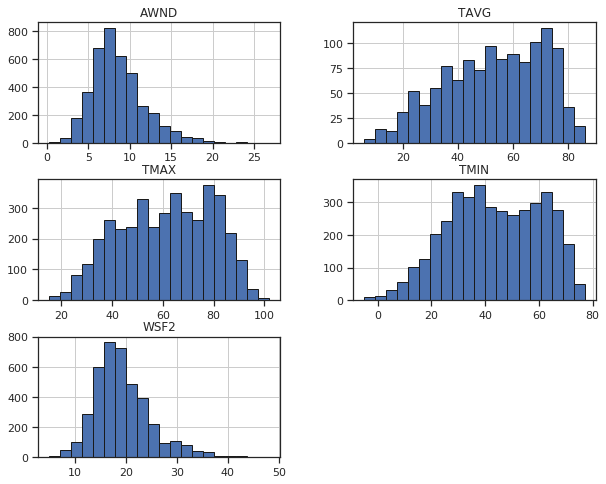

In [443]:
w.loc[:,'TAVG':'WSF2'].hist(bins=20, figsize=(10,8),edgecolor='k')
plt.show()

Average and max wind speed distributions are simialr to normal / gaussian, which adds confidence that the data is legimate since most of the natural processes in nature are normally distributed.

**Outliers**

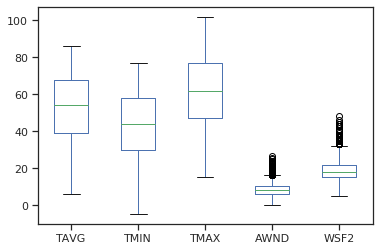

In [444]:
w.loc[:,'TAVG':'WSF2'].plot(kind='box')
plt.show()

The wind related fields have outliers in their distribution.

## Prepare data

### Missing values
* We will fill the 'bad weather' column NaN-s with 0-s.

In [445]:
w.loc[:,'WT01':'WT22'] = w.loc[:,'WT01':'WT22'].fillna(value=0).astype('int')

In [446]:
w.head(2)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Parametrizing 
Since each *bad_weather* field records if the conditon was met that day or not we can create a new field that sums the number of different bad weather conditions - sort of a parametrization to weather conditions. The bigger the number the worse the weather.

In [447]:
w['bad_conditions'] = w.loc[:,'WT01':'WT22'].sum(axis='columns').astype('int')
w.head(2)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1,0,0,...,1,0,0,0,0,0,0,0,0,2
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,0,0,0,...,0,0,0,1,0,1,0,0,0,2


### Mapping
We can map a rating to *bad_conditions* field value.

In [448]:
w.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

The *bad_conditions* filed ranges from 0 to 9. We can rate it as:<br>
* 0 : 'good'
* 1 - 4 : 'bad'
* 5 - 9 : 'worse'

In [449]:
w['rating'] = w.bad_conditions.map(
    lambda x: 'bad' if (x>=1) & (x<=4) else ('good' if x==0 else 'worse'))

In [450]:
w.iloc[:25:5,-2:]

,bad_conditions,rating
0,2,bad
5,9,worse
10,3,bad
15,3,bad
20,0,good


### Data Types

Let's change *rating* field to category and order the values.

In [451]:
w.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [452]:
from pandas.api.types import CategoricalDtype

w['rating'] = w.rating.astype(CategoricalDtype(ordered=True, 
    categories=['good','bad','worse']))
w.rating.head(3)

0    bad
1    bad
2    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

## Merging
We want to merge police_stops df to weather df. We are interested in weather rating column and date column of the weather data.

In [431]:
police_c.head(2)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


In [458]:
w2 = w.loc[:,['DATE','rating']]
w2['DATE'] = w2.DATE.astype('datetime64')
w2.head(3)

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad


In [459]:
w2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 2 columns):
DATE      4017 non-null datetime64[ns]
rating    4017 non-null category
dtypes: category(1), datetime64[ns](1)
memory usage: 35.5 KB


In [472]:
#reset police df index since it will be lost during the merge
police_c2 = police_c.copy().reset_index()

#extract only date from the datetime
#since weather data has no time
police_c2['stop_date'] = police_c2.stop_datetime.dt.strftime('%Y-%m-%d').astype('datetime64')

#merge police and weather
police_w = pd.merge(left=police_c2, right=w2, how='left',
                    left_on='stop_date', right_on='DATE')
police_w.head(5)

,stop_datetime,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk,stop_date,DATE,rating
0,2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,2005-01-04,2005-01-04,bad
1,2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,2005-01-23,2005-01-23,worse
2,2005-02-17 04:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,2005-02-17,2005-02-17,good
3,2005-02-20 17:15:00,M,White,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,2005-02-20,2005-02-20,bad
4,2005-02-24 01:20:00,F,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,2005-02-24,2005-02-24,bad


In [473]:
police_w.shape

(86536, 15)

## Analysis

**Does weather affect the arrest rate?**

In [476]:
#overall arrest rate
police_w.is_arrested.mean()

0.0355690117407784

In [474]:
police_w.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [480]:
#arrest rate for each violation and rating
police_w.groupby(['violation','rating']).is_arrested.mean().to_frame().unstack()

is_arrested                    
rating                     good       bad     worse
violation                                          
Equipment              0.059007  0.066311  0.097357
Moving violation       0.056227  0.058050  0.065860
Other                  0.076966  0.087443  0.062893
Registration/plates    0.081574  0.098160  0.115625
Seat belt              0.028587  0.022493  0.000000
Speeding               0.013405  0.013314  0.016886

In [478]:
#same table with different approach
police_w.pivot_table(values='is_arrested',
                     index='violation',
                     columns='rating',
                     aggfunc='mean')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


It turns out that weather indeed affects the arrest rate. The worse the weather the more arrests are done.